In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yfin
yfin.pdr_override()

In [2]:
data = pdr.DataReader('LT.NS', source = 'yahoo', start = '2017-1-1')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,904.033325,912.666687,899.433350,906.400024,807.442505,1476811
2017-01-03,906.666687,916.666687,901.466675,911.466675,811.956055,1363398
2017-01-04,916.666687,920.900024,913.666687,917.733337,817.538574,2144739
2017-01-05,921.500000,930.000000,918.666687,928.200012,826.862427,2781498
2017-01-06,930.000000,935.799988,925.066650,927.299988,826.060669,1462912
...,...,...,...,...,...,...
2022-09-02,1900.500000,1958.800049,1900.250000,1940.500000,1940.500000,3201140
2022-09-05,1947.949951,1972.750000,1942.099976,1968.349976,1968.349976,2474746
2022-09-06,1973.800049,1985.099976,1951.300049,1962.300049,1962.300049,1172733


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,904.033325,912.666687,899.433350,906.400024,807.442505,1476811
2017-01-03,906.666687,916.666687,901.466675,911.466675,811.956055,1363398
2017-01-04,916.666687,920.900024,913.666687,917.733337,817.538574,2144739
2017-01-05,921.500000,930.000000,918.666687,928.200012,826.862427,2781498
2017-01-06,930.000000,935.799988,925.066650,927.299988,826.060669,1462912


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2017-01-02 to 2022-09-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1406 non-null   float64
 1   High       1406 non-null   float64
 2   Low        1406 non-null   float64
 3   Close      1406 non-null   float64
 4   Adj Close  1406 non-null   float64
 5   Volume     1406 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 76.9 KB


In [5]:
prices = data['Adj Close']
prices

Date
2017-01-02     807.442505
2017-01-03     811.956055
2017-01-04     817.538574
2017-01-05     826.862427
2017-01-06     826.060669
                 ...     
2022-09-02    1940.500000
2022-09-05    1968.349976
2022-09-06    1962.300049
2022-09-07    1958.099976
2022-09-08    1952.000000
Name: Adj Close, Length: 1406, dtype: float64

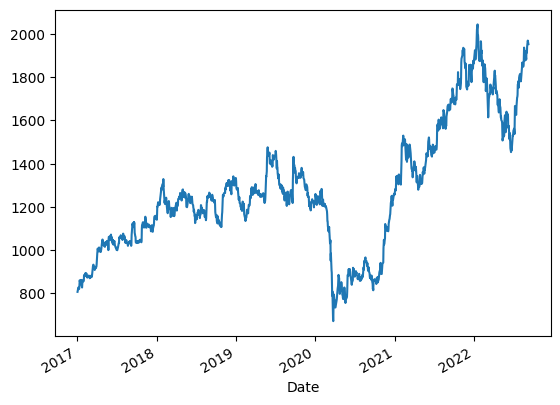

In [6]:
prices.plot()
plt.show()

In [7]:
prices = prices.to_frame()

In [8]:
prices['7_Day_MA'] = (prices['Adj Close'] + prices['Adj Close'].shift(1) + prices['Adj Close'].shift(2) + prices['Adj Close'].shift(3) + prices['Adj Close'].shift(4) + prices['Adj Close'].shift(5) + prices['Adj Close'].shift(6))/7
prices

,Adj Close,7_Day_MA
Date,,
2017-01-02,807.442505,NaN
2017-01-03,811.956055,NaN
2017-01-04,817.538574,NaN
2017-01-05,826.862427,NaN
2017-01-06,826.060669,NaN
...,...,...
2022-09-02,1940.500000,1904.871425
2022-09-05,1968.349976,1915.585711
2022-09-06,1962.300049,1927.642857


In [9]:
tickers = ['LT.NS','^NSEI']
data3 = pd.DataFrame()
for t in tickers:
    data3[t] = pdr.DataReader(t, start = '2017-1-1', source = 'yahoo')['Adj Close']
data3

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,LT.NS,^NSEI
Date,,
2017-01-02,807.442505,8179.500000
2017-01-03,811.955994,8192.250000
2017-01-04,817.538452,8190.500000
2017-01-05,826.862488,8273.799805
2017-01-06,826.060730,8243.799805
...,...,...
2022-09-02,1940.500000,17539.449219
2022-09-05,1968.349976,17665.800781
2022-09-06,1962.300049,17655.599609


In [10]:
log_rets = np.log(data3/data3.shift(1))
log_rets

,LT.NS,^NSEI
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.005574,0.001558
2017-01-04,0.006852,-0.000214
2017-01-05,0.011340,0.010119
2017-01-06,-0.000970,-0.003632
...,...,...
2022-09-02,0.014299,-0.000191
2022-09-05,0.014250,0.007178
2022-09-06,-0.003078,-0.000578


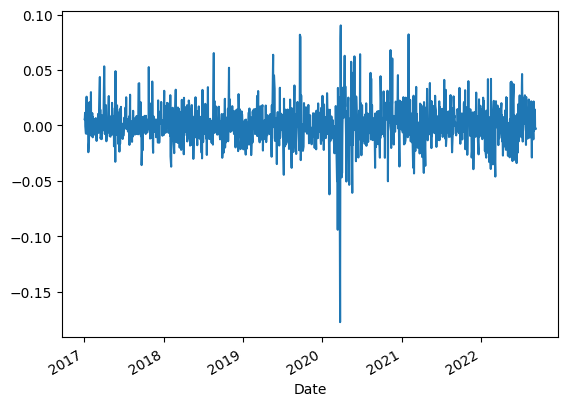

In [11]:
log_rets['LT.NS'].plot()
plt.show()

On average, the stockmarket opens on 250 days in a year

In [12]:
cov = log_rets.cov()*250
cov

,LT.NS,^NSEI
LT.NS,0.076791,0.036233
^NSEI,0.036233,0.034081


In [13]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.03623295641513853

In [14]:
market_var = log_rets['^NSEI'].var()*250
market_var

0.034081067601313485

Calculating the Beta (measure of volatility)

In [15]:
beta = cov_with_market/market_var
beta

1.0631402994471368

Calculating Risk Free Premium

In [16]:
rfm = log_rets['^NSEI'].mean()*250
rfm

0.13573768758448868

In [17]:
exp_ret = 0.0675 + beta*(rfm - 0.0675)
exp_ret

0.14004623561215346

Sharpe Ratio

In [18]:
sr = (exp_ret - 0.0675)/(log_rets['LT.NS'].std()*250**0.5)
sr

0.26179317802794033

Monte Carlo Simulation of L&T Stock

In [20]:
from scipy.stats import norm
mean_d = log_rets['LT.NS'].mean()
var_d = log_rets['LT.NS'].var()

#drift = avg daily return + 1/2(Variance)

drift = mean_d + 0.5*var_d
drift

0.0007817750393379661

In [21]:
std = log_rets['LT.NS'].std()

drift = np.array(drift)
std = np.array(std)

In [22]:
t_interval = 1000
iterations = 10
x = np.random.rand(t_interval, iterations)

daily_returns = np.exp(drift + std*norm.ppf(x))

In [23]:
S0 = data3['LT.NS'].iloc[-1]
price = np.zeros_like(daily_returns)
price[0] = S0
price

array([[1951.75, 1951.75, 1951.75, ..., 1951.75, 1951.75, 1951.75],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

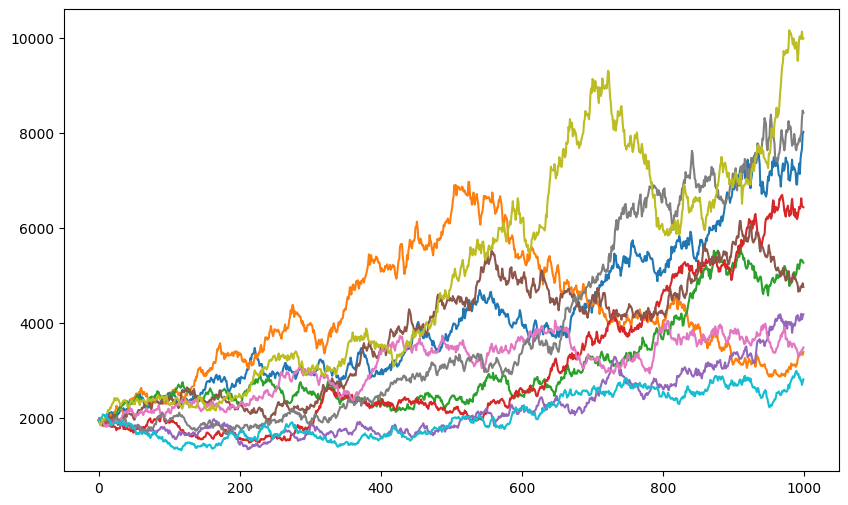

In [24]:
for t in range (1, t_interval):
    price[t] = price[t-1]*daily_returns[t]
    
plt.figure(figsize = (10,6))
plt.plot (price)

Fin.